In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def power(x,n):
    return x**n

In [3]:
power(2,5)

32

In [ ]:
# def pangkat(x,n):
#     xx = []
#     for i in range(1,n+1):
#         xx.append(x**i)
#     return xx

In [6]:
def factorial(x):
    if x <= 1:
        return 1
    else:
        return x*factorial(x-1)

In [ ]:
# def fact(n):
#     fac = []
#     for i in range(1,n+1):
#         fac.append(factorial(i))
#     return fac
# n itu batas

In [4]:
def exp(x):
    n = 0
    sum = 0
    threshold = 0.0001
    current = 1
    previous = 0

    while True:
        sum += power(x,n) / factorial(n)
        current = sum

        if abs(current - previous) <= threshold:
            break

        previous = current
        n += 1
    
    return current, n

In [9]:
exp(-1)

(0.3678819444444445, 8)

In [8]:
math.exp(1)

2.718281828459045

In [10]:
math.exp(-1)

0.36787944117144233

In [11]:
data = pd.read_csv("datakuis.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-12,6694.583984,6722.373047,6670.521973,6722.373047,6722.373047,158712000
1,2023-06-13,6722.373047,6744.038086,6697.070801,6719.014160,6719.014160,176568000
2,2023-06-14,6718.874023,6744.644043,6672.855957,6699.716797,6699.716797,178279800
3,2023-06-15,6699.716797,6717.456055,6660.909180,6713.794922,6713.794922,151187300
4,2023-06-16,6713.515137,6726.456055,6669.335938,6698.546875,6698.546875,172061800


In [14]:
data['Open'][1]

6722.373047

In [17]:
data.shape[0]

235

In [19]:
for i in range(data.shape[0]):
    if data['Open'][i] < data['Close'][i]:
        data['Kenaikan'][i].apply("Naik")
    elif data['Open'][i] > data['Close'][i]:
        data['Kenaikan'][i].apply("Turun")
    else:
        data['Kenaikan'][i].apply("Tetap")

AttributeError: 'str' object has no attribute 'apply'

In [20]:
for i in range(len(data)):
    if data.loc[i, 'Open'] < data.loc[i, 'Close']:
        data.loc[i, 'Kenaikan'] = "Naik"
    elif data.loc[i, 'Open'] > data.loc[i, 'Close']:
        data.loc[i, 'Kenaikan'] = "Turun"
    else:
        data.loc[i, 'Kenaikan'] = "Tetap"

In [21]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Kenaikan
0,2023-06-12,6694.583984,6722.373047,6670.521973,6722.373047,6722.373047,158712000,Naik
1,2023-06-13,6722.373047,6744.038086,6697.070801,6719.014160,6719.014160,176568000,Turun
2,2023-06-14,6718.874023,6744.644043,6672.855957,6699.716797,6699.716797,178279800,Turun
3,2023-06-15,6699.716797,6717.456055,6660.909180,6713.794922,6713.794922,151187300,Naik
4,2023-06-16,6713.515137,6726.456055,6669.335938,6698.546875,6698.546875,172061800,Turun
...,...,...,...,...,...,...,...,...
230,2024-06-04,7071.094238,7149.192871,7065.034180,7099.312012,7099.312012,160663800,Naik
231,2024-06-05,7114.535156,7118.349121,6934.942871,6947.669922,6947.669922,137116300,Turun
232,2024-06-06,6992.562988,7032.574219,6939.545898,6974.896973,6974.896973,129986000,Turun
233,2024-06-07,6987.793945,6994.115234,6887.812012,6897.950195,6897.950195,109886700,Turun


In [22]:
data.to_excel('data_kenaikan.xlsx', index = False, header=True)

In [25]:
def counting(input):
    naik = 0
    turun = 0
    tetap = 0
    for i in range(len(input)):
        if input[i] == "Naik":
            naik += 1
        elif input[i] == "Turun":
            turun += 1
        else:
            tetap += 1

    return naik, turun, tetap

In [24]:
def hitung(x):
    return x.value_counts()

hitung(data["Kenaikan"])

Kenaikan
Naik     124
Turun    111
Name: count, dtype: int64

In [26]:
counting(list(data['Kenaikan']))

(124, 111, 0)

<Axes: xlabel='Kenaikan', ylabel='count'>

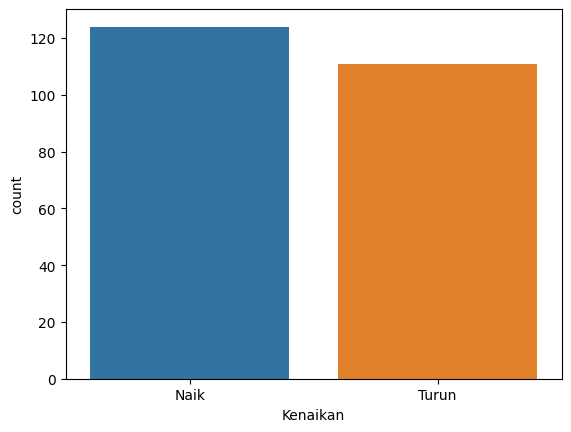

In [30]:
#plt.figure(figsize=(12,6))
sns.countplot(x = 'Kenaikan', data = data, hue = 'Kenaikan')
#plt.show